### KNN Classifier Example

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import roc_curve, auc


### Data Preprocess

In [3]:
df = pd.read_csv("../data/diabetes.csv")

In [4]:
df.sample(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
729,2,92,52,0,0,30.1,0.141,22,0
193,11,135,0,0,0,52.3,0.578,40,1
540,8,100,74,40,215,39.4,0.661,43,1
17,7,107,74,0,0,29.6,0.254,31,1
182,1,0,74,20,23,27.7,0.299,21,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

This parameters is important to measure diabetes values and not accepted zero or nan.
- Glucose : normal level 70-100 mg/dl,
- BloodPressure,
- SkinThickness,
- Insulin and
- BMI : Body Mass Index.



In [7]:
not_zero_columns = ["Glucose",	"BloodPressure", "SkinThickness", "Insulin", "BMI"]

for column in not_zero_columns:
    df[column] = df[column].replace(0, np.NAN)
    mean = int(df[column].mean(skipna=True))
    df[column] = df[column].replace(np.NAN,mean)

In [8]:
df.sample(7)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
516,9,145.0,88.0,34.0,165.0,30.3,0.771,53,1
598,1,173.0,74.0,29.0,155.0,36.8,0.088,38,1
181,0,119.0,64.0,18.0,92.0,34.9,0.725,23,0
725,4,112.0,78.0,40.0,155.0,39.4,0.236,38,0
453,2,119.0,72.0,29.0,155.0,19.6,0.832,72,0
550,1,116.0,70.0,28.0,155.0,27.4,0.204,21,0
304,3,150.0,76.0,29.0,155.0,21.0,0.207,37,0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.682292,30.435999,44.000,99.75000,117.0000,140.25000,199.00
BloodPressure,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
SkinThickness,768.0,29.108073,8.791221,7.000,25.00000,29.0000,32.00000,99.00
Insulin,768.0,155.281250,85.021550,14.000,121.50000,155.0000,155.00000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


### Data Visualization

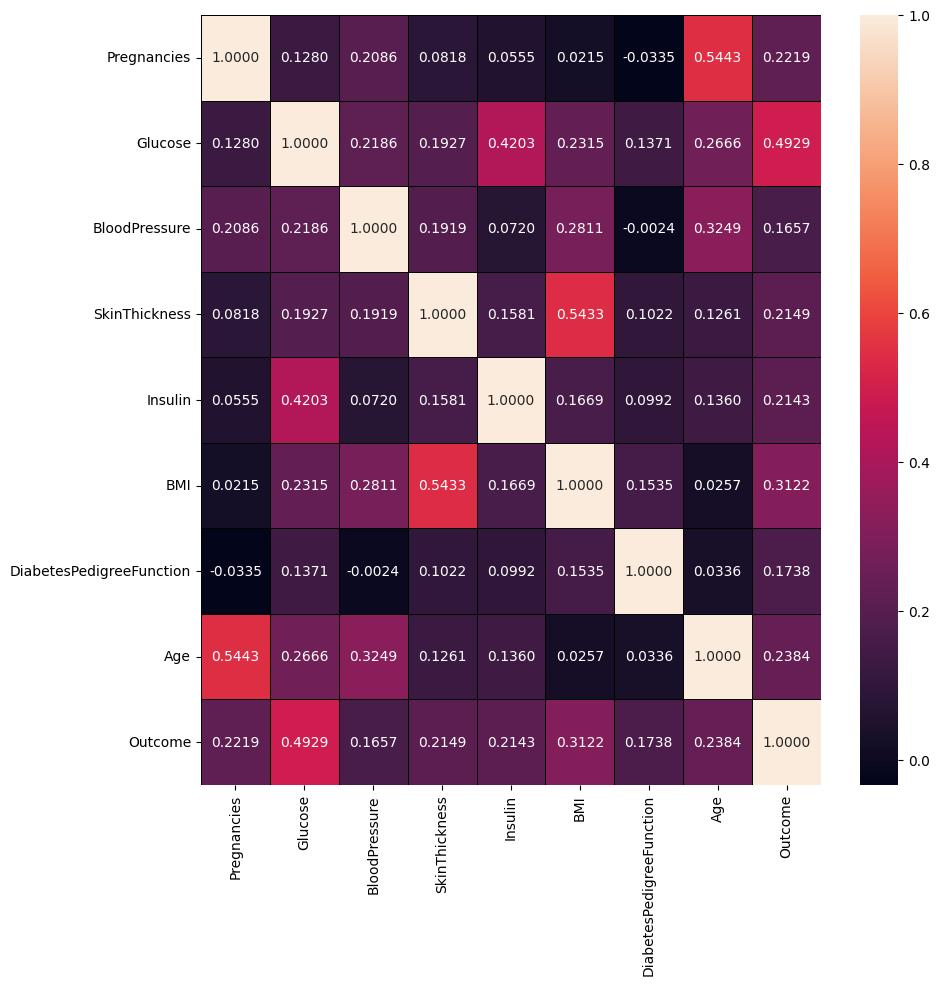

In [23]:
f, ax = plt.subplots(figsize = (10,10))
sns.heatmap(df.corr(), annot = True, linewidths = 0.5, linecolor = "black", fmt = ".4f", ax = ax)
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


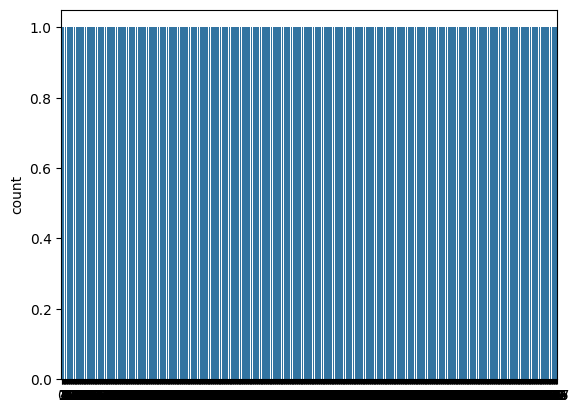

In [24]:
plt.figure()
sns.countplot(df.Outcome)
print(df.Outcome.value_counts())

<Axes: xlabel='Glucose', ylabel='Age'>

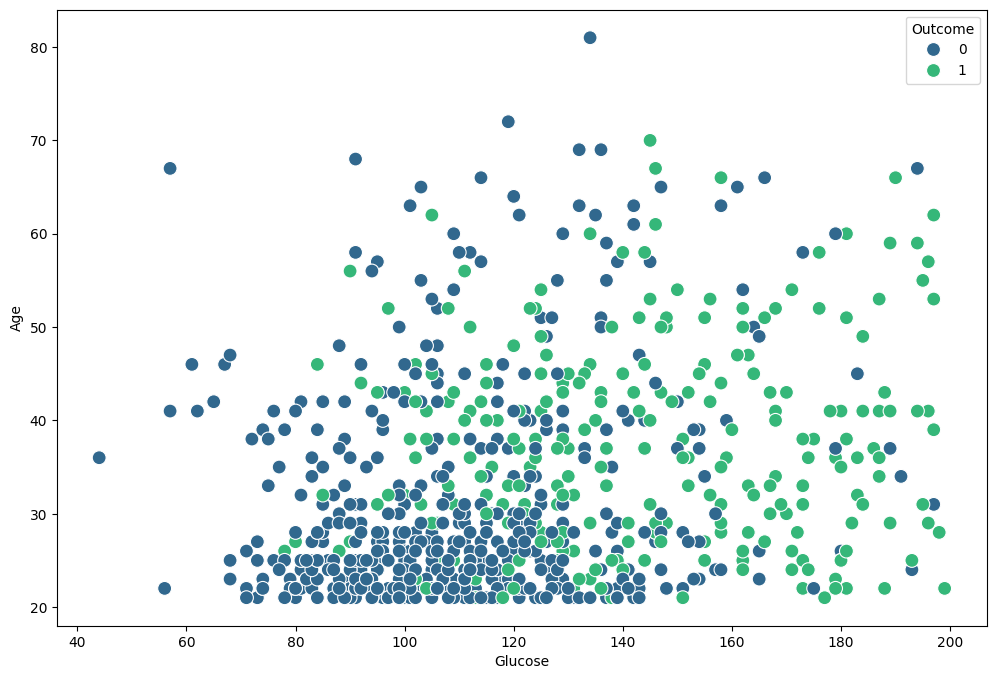

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(
    x="Glucose",
    y="Age",
    hue = "Outcome",
    data = df,
    palette ="viridis",
    s=100
    )

In [12]:
newdf = pd.DataFrame(df)
newdf["Glucose_cat"] = pd.cut(df["Glucose"],
                              bins=[-1, 40, 80, 120, 160, np.inf],
                              labels=[1, 2, 3, 4, 5])

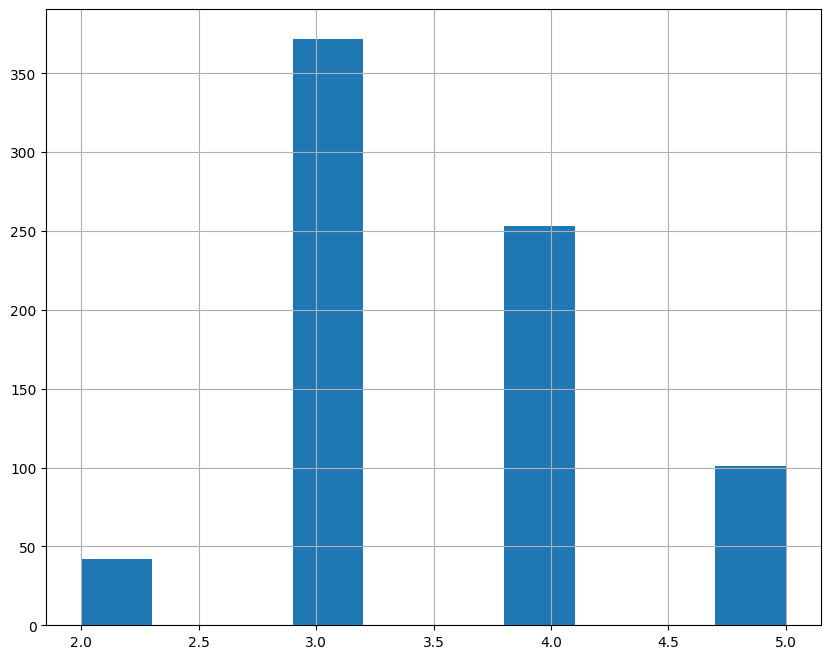

In [13]:
fig21, ax21 = plt.subplots(figsize=(10, 8))

newdf["Glucose_cat"].hist(ax=ax21)
plt.show()

### Data Modelling

#### train test split

In [14]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]
# y = Outcome column, X = columns of rest

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


#### feature scalling

In [15]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

#### KNN Model

In [16]:
# Looking to desicion k of number
import math 
math.sqrt(len(y_test))


12.409673645990857

In [17]:
neigh11 = KNeighborsClassifier(n_neighbors=11,p=2, metric="euclidean")

neigh11.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [18]:
y_pred = neigh11.predict(X_test)
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [19]:
confusion = confusion_matrix(y_test, y_pred)
print(f" confusion_matrix :\n {confusion} ")

accuracy =accuracy_score(y_test,y_pred)
print("Accuracy : ",accuracy)

precision = precision_score(y_test, y_pred)
print("Precision Score : ",precision)

recall = recall_score(y_test, y_pred)
print("Recall Score : ",recall)

f1 = f1_score(y_test,y_pred)
print("F1 Score: ",f1)

 confusion_matrix :
 [[95 12]
 [18 29]] 


AttributeError: Axes.set() got an unexpected keyword argument 'figsize'

<Figure size 640x480 with 0 Axes>

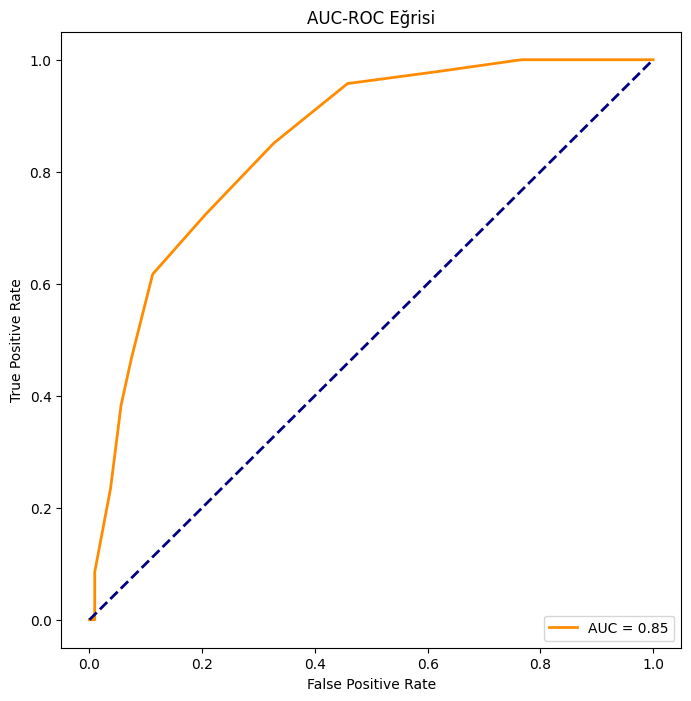

In [ ]:
y_prob = neigh11.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Eğrisi')
plt.legend(loc='lower right')
plt.show()